<h1><center>Drawing Conclusions using Faculty Course Evaluations (FCE) and other Data</center></h1>

At the end of every semester, Carnegie Mellon University asks its students to complete Faculty Course Evaulations (FCEs). These evaluations gives the students the opportunity to rate the course and the professor by providing ratings (on a scale of 1 through 5) on various criterias such as `Interest in Student Learning` and `Demonstrate Importance of Subject Matter`.  <br>

While many students merely use the FCE data to check how much hours one should commit to the class and the rating to decide whether to take the class or not, this Jupyter Notebook will explore what other interesting questions we can ask about this data. Using the FCE data and the data gathered from CMU Directory, we will be exploring a few questions related to overall course rate, hours per week, and the instructor's title/track.

# Table of Content:
1. [Getting Started](#getting_started) <br>
    - 1.1 [Import libraries](#getting_started) <br>
    - 1.2 [Cleaning the FCE Data](#clean) <br>
<br>
2. [Question One](#q1): **What influences overall course rate**? <br>
    - 2.1 [Correlation Matrix](#q1) <br>
        - 2.11 [Conclusion](#q1_con) <br>
    - 2.2 [Level of a Class](#level): Do **level of a class** influence its overall course rate? <br>
        - 2.21 [Visualization](#level_visualize)
        - 2.22 [Conclusion](#q2_con) <br>
    - 2.3 [Summer vs Semester](#summer): How does the rating of a same class vary when they are offered in the **summer** vs in the **semester**?
        - 2.31 [Visualization](#summer_visualize)
        - 2.32 [Hypothesis Testing](#Hypothesis_testing)
            - 2.321 [Checking the Assumptions](#check)
            - 2.322 [Running the Paired Sample T-test](#run)
            - 2.323 [Conclusion](#q3_con) <br>
<br>
3. [Question Two](#change): **How has hours per week changed throughout the years?**
    -  3.1 [Visualization for Undergraduate Students](#undergrad)
    -  3.2 [Visualization for Graduate Students](#grad)
    -  3.3 [Conclusion](#trend_con) <br>
<br>

4. [Question Three](#prof_track_title): **Does an instructor's Track and Title have an impact on his/her overall teaching rate?**
    - 4.1 [Question 1](#4.1): Does **the track of a professor** (teaching vs tenure) influence their overall teaching rating?
        - 4.11 [Step 1: Getting the faculty title data](#s1)
        - 4.12 [Step 2: Using Mozenda to scrape the faculty title data from CMU Directory](#s2)
        - 4.13 [Step 3: Preprocessing the FCE data](#s3)
        - 4.14 [Step 4: Preprocessing the scraped faculty title data](#s4)
        - 4.15 [Step 5: Analysis of teaching vs tenure track professor overall teaching rate](#s5)
        - 4.16 [Conclusion](#4.1_con)
    - 4.2 [Question 2](#4.2): Is there a relationship between **Instructor Titles** and **`Overall teaching rate`**?
        - 4.21 [Visualzation of data (Bar graph)](#4.21)
        - 4.22 [Visualzation of data (Boxplot)](#4.22)
        - 4.23 [Conclusion](#4.23)
5. [Final Conclusions](#5)


<a id="getting_started"></a>
# 1. Getting Started
## 1.1 importing the necessary libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import math, os
from scipy import stats

<a id="clean"></a>
## 1.2 Cleaning the FCE data
Let us first observe what our data looks like.

In [101]:
df = pd.read_csv("fce.csv")
df.head()

,Year,Semester,College,Dept,Course ID,Section,Name,Course Name,Level,Possible Respondents,...,Hrs Per Week 8,Interest in student learning,Clearly explain course requirements,Clear learning objectives & goals,Instructor provides feedback to students to improve,Demonstrate importance of subject matter,Explains subject matter of course,Show respect for all students,Overall teaching rate,Overall course rate
0,2019,Fall,College of Fine Arts,ARC,48358,B1,"BEN-ALON, RACHEL",EARTHEN BUILDING,Undergraduate,26,...,NaN,4.79,4.62,4.57,4.69,4.57,4.71,4.93,4.71,4.71
1,2019,Fall,College of Fine Arts,ARC,48358,A1,"BEN-ALON, RACHEL",EARTHEN BUILDING,Undergraduate,8,...,NaN,5.00,5.00,4.83,4.83,5.00,4.83,5.00,4.33,4.17
2,2019,Fall,College of Fine Arts,ARC,48689,A1,"KIM, MAN",DIGI SKLLS WRKSHP,Graduate,14,...,NaN,4.75,4.63,4.75,4.88,4.50,4.75,4.63,4.75,4.38
3,2019,Fall,College of Fine Arts,ARC,48753,A1,"DAWKINS, MARANTHA",INTRO UD MED,Graduate,14,...,NaN,4.00,3.00,3.60,4.40,3.60,3.40,4.60,3.60,3.20
4,2019,Fall,College of Fine Arts,ART,60131,A1,"GURYSH, STEVEN",3D MEDIA STUDIO I,Undergraduate,11,...,NaN,4.88,4.63,4.86,4.86,4.57,4.86,5.00,4.86,4.71


We want to address any cells that have a value of NaN. We will find how many NaN values exist in each column.

In [102]:
print(df.isna().sum())

Year                                                       0
Semester                                                   0
College                                                    0
Dept                                                       0
Course ID                                                  0
Section                                                    0
Name                                                       1
Course Name                                                0
Level                                                      0
Possible Respondents                                       0
Num Respondents                                            0
Response Rate %                                            0
Hrs Per Week                                           20635
Hrs Per Week 5                                         37504
Hrs Per Week 8                                         42744
Interest in student learning                            1661
Clearly explain course r

Let us clean our data to make it easier to process. There seems to a row where "Name" has a value of NaN. We will drop this row.

In [103]:
df = df[pd.notnull(df['Name'])]  # Dropping the rows with column 'Name' = NaN 

There seems to be a lot of NaN values for columns 'Hrs Per Week 5' and 'Hrs Per Week 8', so we will drop those columns. For the remaining columns with NaN values, we will replace those values with the mean of their respective column

In [104]:
df = df[df["College"] != "Teaching Assistants"]
if "Hrs Per Week 5" in df.columns and "Hrs Per Week 8" in df.columns:
    df = df.drop(columns=["Hrs Per Week 5", "Hrs Per Week 8"])

Let us verify we do not have any more NaN values.

In [105]:
lst = df.columns[df.isnull().any()].tolist()
df[lst] = df[lst].fillna(df[lst].mean())
print(df.isna().sum())

Year                                                   0
Semester                                               0
College                                                0
Dept                                                   0
Course ID                                              0
Section                                                0
Name                                                   0
Course Name                                            0
Level                                                  0
Possible Respondents                                   0
Num Respondents                                        0
Response Rate %                                        0
Hrs Per Week                                           0
Interest in student learning                           0
Clearly explain course requirements                    0
Clear learning objectives & goals                      0
Instructor provides feedback to students to improve    0
Demonstrate importance of subje

Now that we have cleaned up the data, let us use this to ask questions about Carnegie Mellon Faculty Course Evaluations.

<a id="q1"></a>

# 2. Question One: Which variables influence the `Overall course rate`?
When viewing how to improve the course experience for students, we are interested in knowing what the students tend to value the most.

<a id="cor"></a>
## 2.1 Correlation Matrix
To do this, we first create a correlation matrix to see if any of the existing columns have a strong correlation with `overall course rate`:

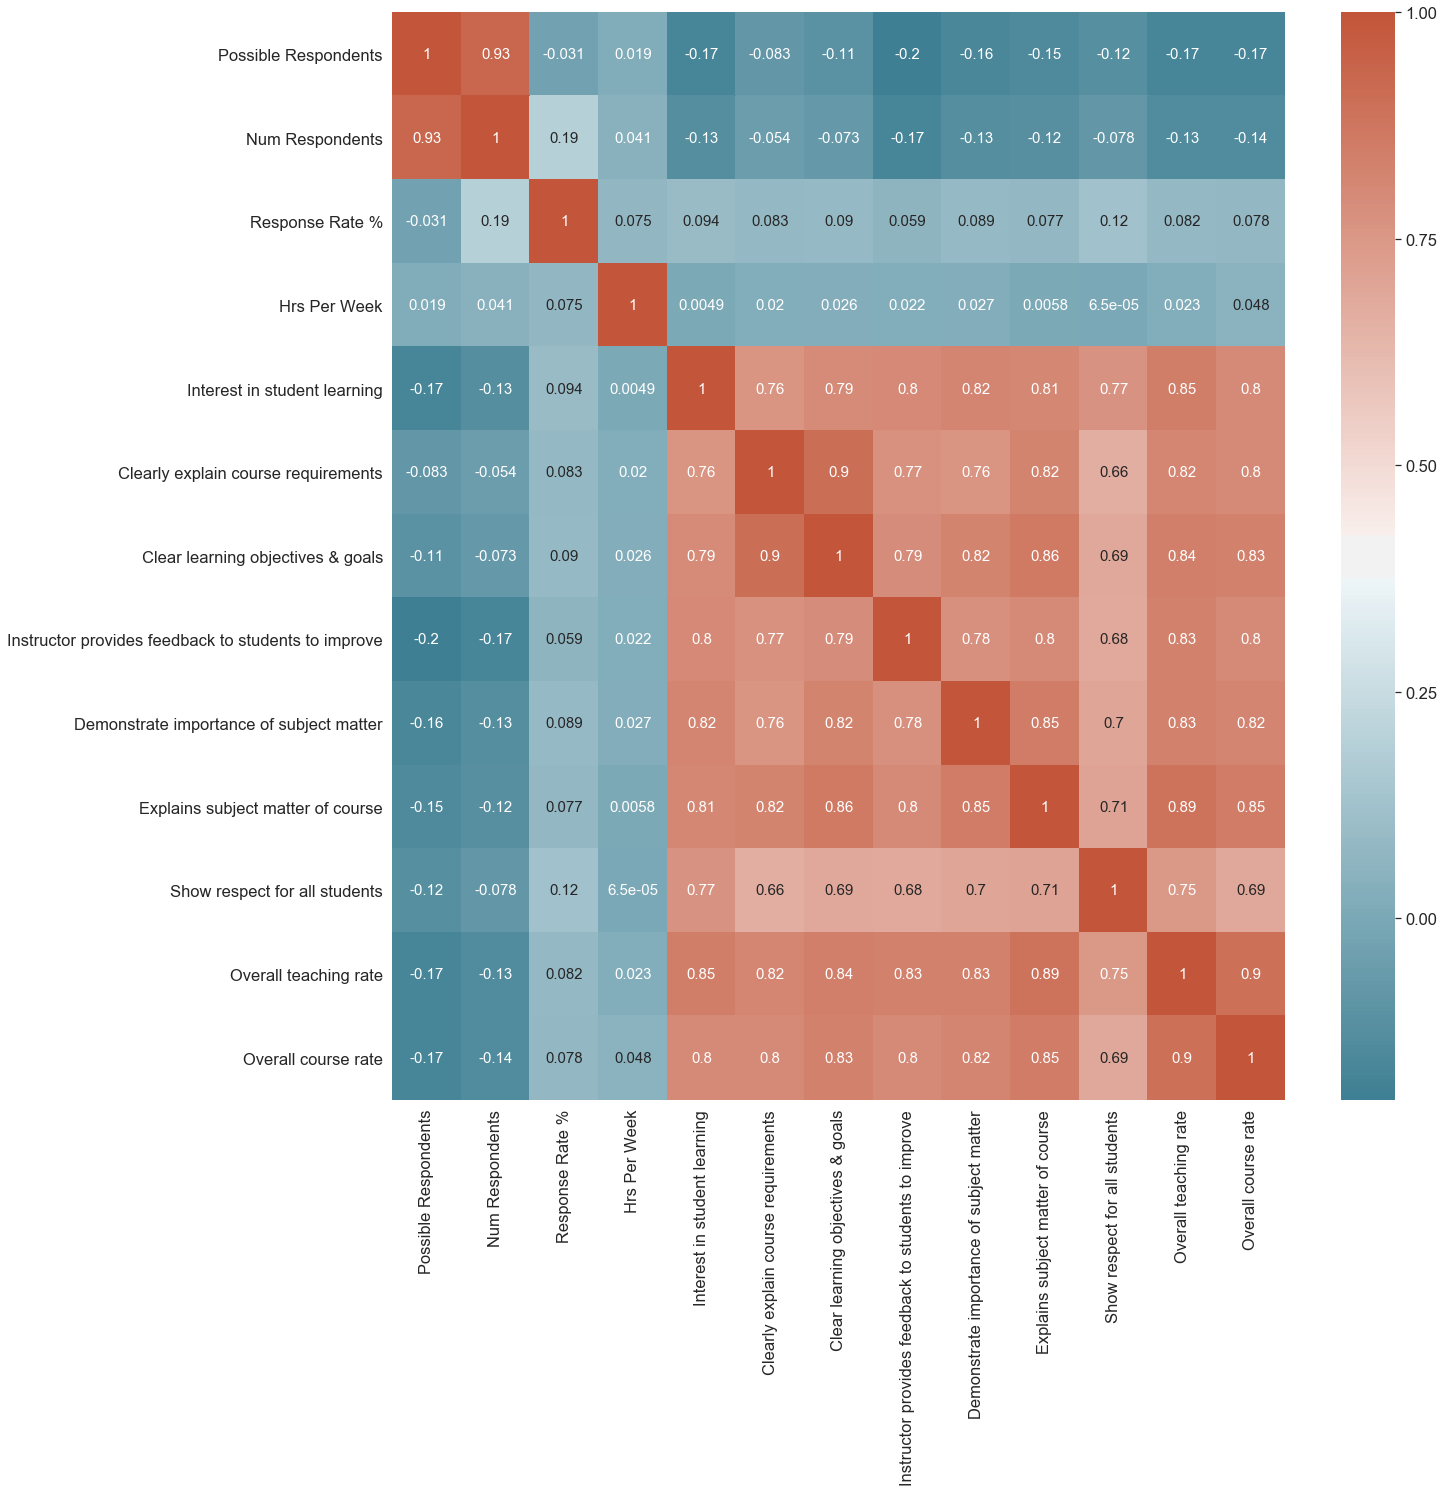

In [106]:
# sns.palplot(sns.color_palette("BrBG", 10))
plt.figure(figsize = (20,20))
corr_lst = list(df.select_dtypes(include=['int', 'float']).columns)
corr_df = df[corr_lst]
try:
    corr_df.drop("Year", axis=1, inplace=True)
except:
    pass
corr = corr_df.corr()
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True),
                 annot=True, annot_kws={"size": 15})

<a id="q1_con"></a>
### 2.12 Conclusion:
Surprisingly, we find that the number of `Hrs per week` a student needs to invest in the class does not seem to affect the `Overall course rating`. Instead, we find that the **`Overall teaching rate`** and the **`Explains subject matter of course`** contributes the most to the **`Overall course rating`**. <br>

This leads us to believe it is **the instructor** which **affects a course experience the most** rather than **the nature of the course itself** (i.e. the belief that a course has a low rating due to it being difficult/time-consuming is not supported by this map).

<a id='level'></a> 
## 2.2 Do level of a class influence its overall course rate?

We are curious to know **whether or not higher level courses** tend to be **rated higher** than lower level courses. 

The **intuition** behind asking the question is that we believe **higher level classes** tend to teach **more focused, expertise knowledge**, and that students tend to choose them based on their interests and may put **more efforts** into the course compared to intro-level courses, which may **affect their overall course experience**. **Another intuition** is that the higher level classes tend to have a smaller size than the lower level courses, and that might affect the overall course experience as well.

<a id='level_visualize'></a> 
### 2.21 Visualize our data
For this analysis, we define the level of a course to be the third digit of the Course ID. For instance, 15-122 is a level 1 course whereas 10-703 is a level 7 course. 
We conduct our analysis by plotting the mean of of each course level within each department:


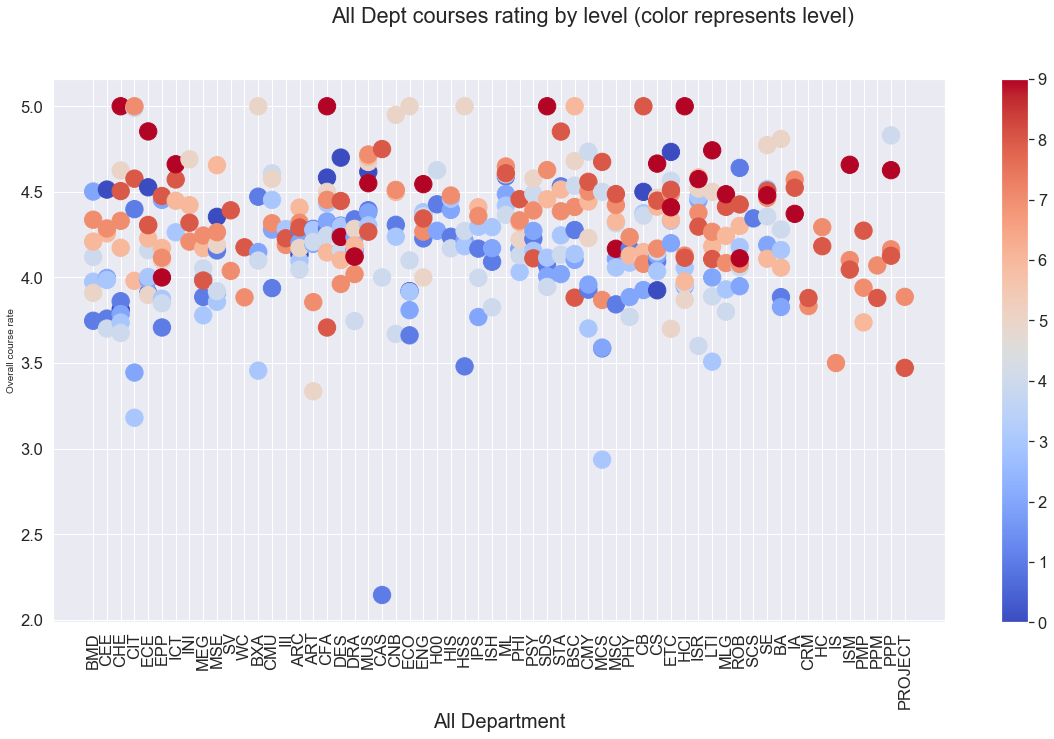

In [107]:
df_dept = df.copy()
def f(x):
    # There are different course listing in the past
    # such as "FA14-12-100" for CIT classes in Fall 2014
    # so here we preprocess these data and create a column for the course ID level
    if x.startswith("F"):
        lst = x.split("-")
        x = lst[-2]+lst[-1]
    x = x[-3:]
    x = int(x)//100
    return (x)
df_dept["Course ID Level"] = df_dept["Course ID"].apply(f)
df_dept_plot = df_dept.groupby(["College", "Dept", "Course ID Level"], as_index=False).mean()
df_dept_plot_selected = df_dept_plot[["College", "Dept", "Course ID Level", "Overall course rate"]]
df_dept_plot_selected["College"].unique()
df_dept_plot_All = df_dept_plot_selected.copy()
min_ID = df_dept_plot_All["Course ID Level"].min()
max_ID = df_dept_plot_All["Course ID Level"].max()
plt_size = 10
fig, ax = plt.subplots(figsize=(2*plt_size,plt_size))
fig.suptitle('All Dept courses rating by level (color represents level)')
ax.set_ylabel("Overall course rate", fontsize=plt_size)
ax.set_xlabel("All Department", fontsize=2*plt_size)
ax.scatter(df_dept_plot_All["Dept"], 
           df_dept_plot_All["Overall course rate"], 
           c = df_dept_plot_All["Course ID Level"], 
           cmap = "coolwarm",s=plt_size*30)

# Alle from https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=min_ID, vmax=max_ID))
# need to "fake" an array for, otherwise throws an error
sm._A = []
plt.colorbar(sm)
plt.xticks(rotation=90)
plt.show()

<a id='q2_con'></a> 
### 2.22 Conclusion
### Analysis of graph:

* The **x-axis** represents the **different departments** at CMU that we gathered from the FCE data.<br>
* The **y-axis** represents the **mean overall course rate**.<br>
* The **dots** along the y-axis represents the mean overall course rate for different level of classes for the corresponding department.<br>
* The **color** of the dots represents the **course level**. The **colorbar** at the right shows the different colors for the different levels of classes.
  * The **redder** the point is, the **higher the level**.
  * For example, the darkest blue color means the level 0 classes, for example, the Architecure First-Year Seminar is listed as 48026, and has level 0 according to our definition above. <br>

### Findings:
* Interestingly, from the graph we can observe that the redder dots (representing higher level courses) tend to be plotted above the blue (representing the lower level courses) across all departments at CMU. 
* We want to know if there is a postivie correlation between the level of a class and its overall course rating.

In [108]:
print("Correlation between a class's Course ID Level and Overall Course Rating at CMU is",\
      df_dept_plot_All['Course ID Level'].corr(df_dept_plot_All["Overall course rate"]))

Correlation between a class's Course ID Level and Overall Course Rating at CMU is 0.28853154749941035


We can see that there is indeed positive correlation between the level of a course and its oveall course rating at CMU. That is, higher level classes indeed tend to be rated higher.

<a id='summer'></a> 
## 2.3 Are Summer Courses Better than Year Courses?
Carnegie Mellon University offers its students to take certain courses during the summer as opposed to during the year. We were interested in finding whether summer courses offer a better or worse experience than their semester counterparts.

<a id='summer_visualize'></a> 
### 2.31 Visualizing our data

To start off, we create a bar graph comparing the mean rating of a course offered in the summer vs. in the semester. We omitted classes that were offered in the summer less than three times. 

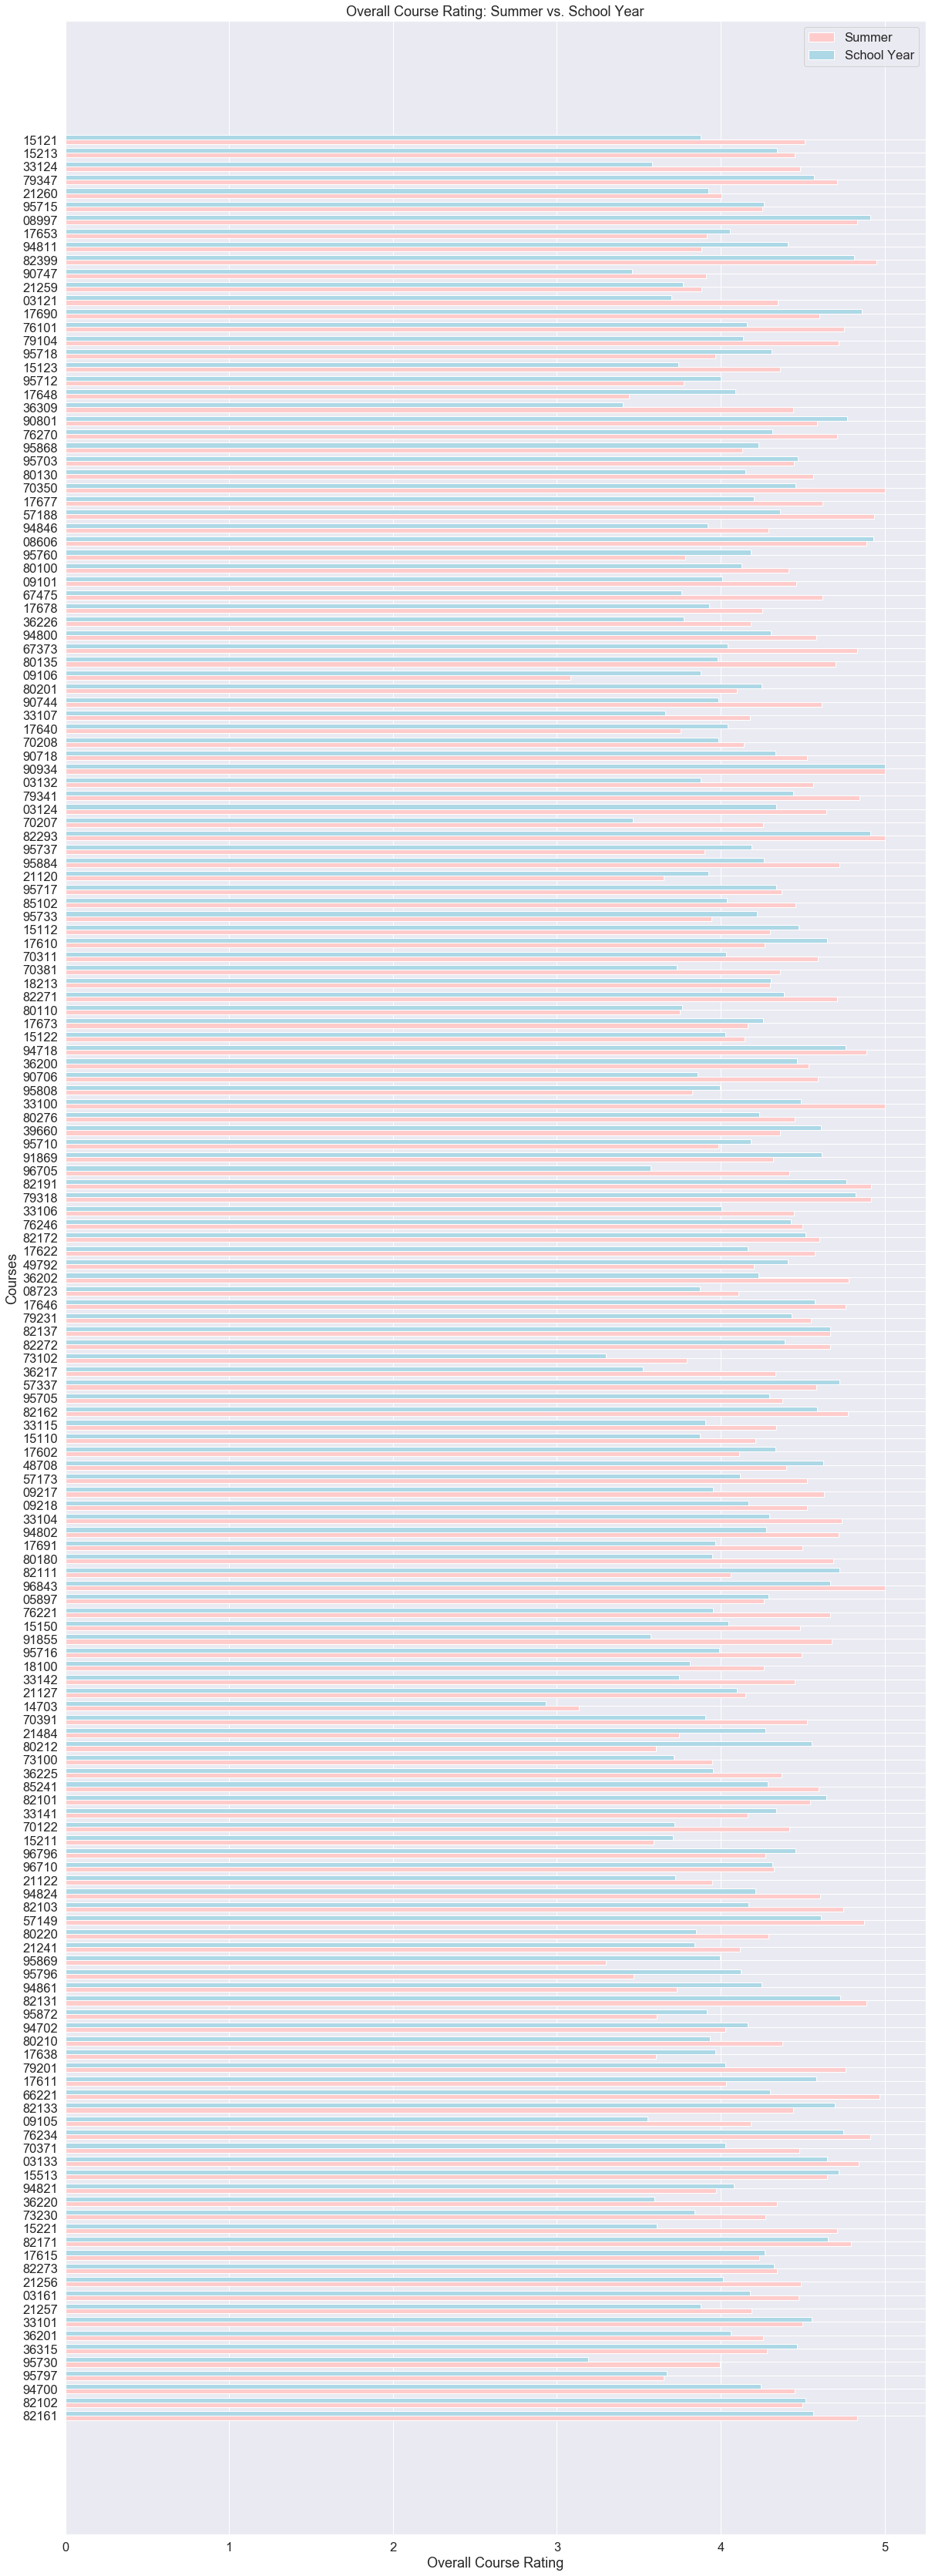

In [109]:
df_summer = df[df['Semester'] == "Summer"]
df_year = df[df['Semester'] != "Summer"]

summer_set_temp = set(df_summer["Course ID"])
summer_set = set()

for cls in summer_set_temp:
    if len(df_summer[df_summer["Course ID"] == cls]) >= 3:
        summer_set.add(cls)

year_set = set(df_year["Course ID"])

total_set = summer_set.intersection(year_set)

summer_rating = []
year_rating = []
courses = []

for cls in total_set:
    summer_rating.append(df_summer[df_summer["Course ID"] == cls]["Overall course rate"].mean())
    year_rating.append(df_year[df_year["Course ID"] == cls]["Overall course rate"].mean())
    courses.append(cls)
    
ratings = [0,1,2,3,4,5]

N = len(summer_rating)
summer = summer_rating

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20, 60))
bar1 = ax.barh(ind, summer_rating, width, color='#ffcccb')

year = year_rating
bar2 = ax.barh(ind + width, year_rating, width, color='#add8e6')

# add some text for labels, title and axes ticks
ax.set_xlabel('Overall Course Rating')
ax.set_ylabel('Courses')
ax.set_title("Overall Course Rating: Summer vs. School Year")
ax.set_yticks(ind + width / 2)
ax.set_xticklabels(ratings)
ax.set_yticklabels(courses)

ax.legend((bar1[0], bar2[0]), ('Summer', 'School Year'))

plt.show()

On visual inspection, it seems as if a course gets rated higher if offered in the summer as opposed to the year.

<a id='Hypothesis_testing'></a> 
### 2.32 Running a Hypothesis Testing
We want to now do a hypothesis testing to see if there is a significant difference in a course's rating if offered in the summer vs. the year. To do this, we will conduct a Paired Samples T-Test.

Before we do, we will check if the <a href="https://libguides.library.kent.edu/SPSS/PairedSamplestTest">requirements</a> are satisified:


<a id='check'></a> 
#### Checking for Outliers

We first want to check for outliers in the differences. We will do this by check the box plot.

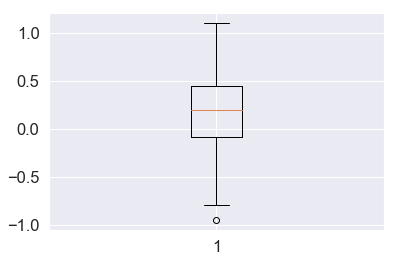

In [110]:
diff = [summer_rating[i] - year_rating[i] for i in range(len(summer_rating))]
plt.boxplot(diff)
plt.show()

Before proceeding, we will eliminate the outlier. We will plot the differences again to ensure we have no outliers

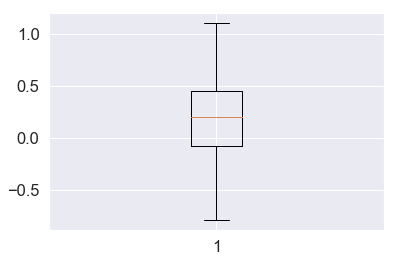

In [111]:
outlier = diff.index(min(diff))
summer_rating.pop(outlier)
year_rating.pop(outlier)
diff = [summer_rating[i] - year_rating[i] for i in range(len(summer_rating))]
plt.boxplot(diff)
plt.show()

#### Checking for Normal Distribution

Now, we want to check that the differences are normally distributed. To do this, we will create a QQ-plot.

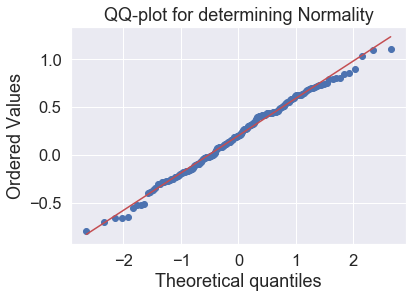

In [112]:
stats.probplot(diff,plot=plt)
plt.title("QQ-plot for determining Normality")
plt.show()

Since our data roughly follows the red line, we know that the differences are normally distributed. 

#### Checking if Dependent Variables are Continuous

We know that this is satisfied because rating of a class is equal to the mean of all the ratings of the same class, and thus rating $\in$ [0, 5]

#### Check for Dependent Observations
We want to check that the subjects for the groups are the same, this is satisfied because the summer ratings and semester ratings corresponds to the same classes.

#### Check for Random Sampling
Because we have the data from 2009-2019, we treat this data as a random sample to infer about the overall relationship between future CMU summer and semester courses. 

<a id='run'></a> 
### 2.322 Running the Paired Sample T-Test
With the conditions satisfied, we will run our Paired Sample T-Test.

We will first define our Null Hypothesis( $H_0$ ) and Alternative Hypothesis( $H_A$ ):

* Null Hypothesis( $H_0$ ): the mean difference between summer ratings and semester ratings is zero. <br>
* Alternative Hypothesis( $H_A$ ): the mean difference between summer ratings and semester ratings is **not** equal to zero.

In [113]:
stats.ttest_rel(summer_rating, year_rating)

Ttest_relResult(statistic=6.826605344854823, pvalue=1.4923784566820535e-10)

<a id='q3_con'></a> 
### 2.323 Conclusion:
We find that our p-value is less than 0.05, meaning that we can reject the null hypothesis and conclude that the mean difference between summer ratings and semester ratings is not equal to zero. That is, the **course ratings in summer** is **statistically higher** than the **course ratings in the semester** for the same courses.

<a id='change'></a> 
## 3. How has the 'Hrs Per Week' changed over the years?

We are curious to know how the hours per week students have to invest in their classes has changed over the years. We are also interested in comparing the change in hours per week over the years between the **undergraduate** and **graduate** courses.

To start, we seperate our data by undergraduate and graduate courses.

In [114]:
df_grad = df[df['Level'] == "Graduate"]
df_undergrad = df[df['Level'] == "Undergraduate"]

avg_grad_fce = df_grad.groupby(["Year", "College"], as_index=False).mean()
avg_undergrad_fce = df_undergrad.groupby(["Year", "College"], as_index=False).mean()


Next, we create a line graph to observe the **trend of hours per week over time**. To do so, we will create a function that will create a line graph which plots the `Hrs Per Week` vs. `Year`. Because we find that a lot of data points for overall course rating is missing prior to 2014, so we only plot the hours per week from **2014-2019** for more accurate data.

In [115]:
def getGraph(df):
    data = {}
    years = set()

    for index, row in df.iterrows():
        col = row["College"]
        if col in data:
            data[col].append(row["Hrs Per Week"])
        else:
            data[col] = [row["Hrs Per Week"]]
        years.add(row["Year"])

    years = list(years)
    years.sort()

    plt.figure(figsize=(20,15))

    for d in data:
        if(len(data[d]) == len(years)):
            plt.plot(years, data[d], label = d.strip())
            plt.legend()

    plt.xlabel('Year')
    plt.ylabel('Hours Per Week')
    plt.title("Undergraduate Students Hours Per Week over 2013-Present")
    plt.yticks(np.arange(5, 16, step=1))

    plt.show()

<a id='undergrad'></a> 
### 3.1 Undergraduate Students

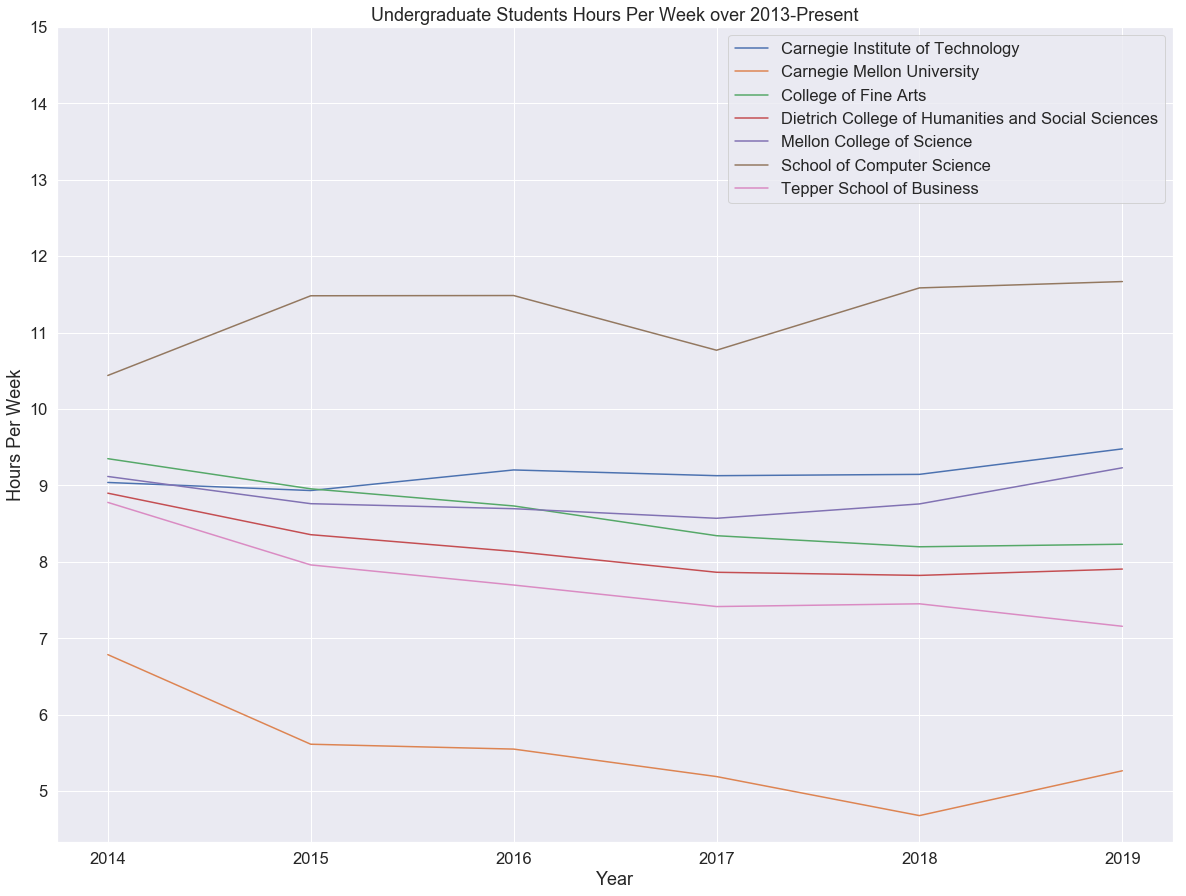

In [116]:
avg_undergrad_fce = avg_undergrad_fce.groupby(["Year", "College"], as_index=False).mean()
avg_undergrad_fce = avg_undergrad_fce[avg_undergrad_fce["Year"] > 2013]
avg_undergrad_fce = avg_undergrad_fce[["Year", "College","Hrs Per Week"]]

getGraph(avg_undergrad_fce)

<a id='grad'></a> 
### 3.2 Graduate Students

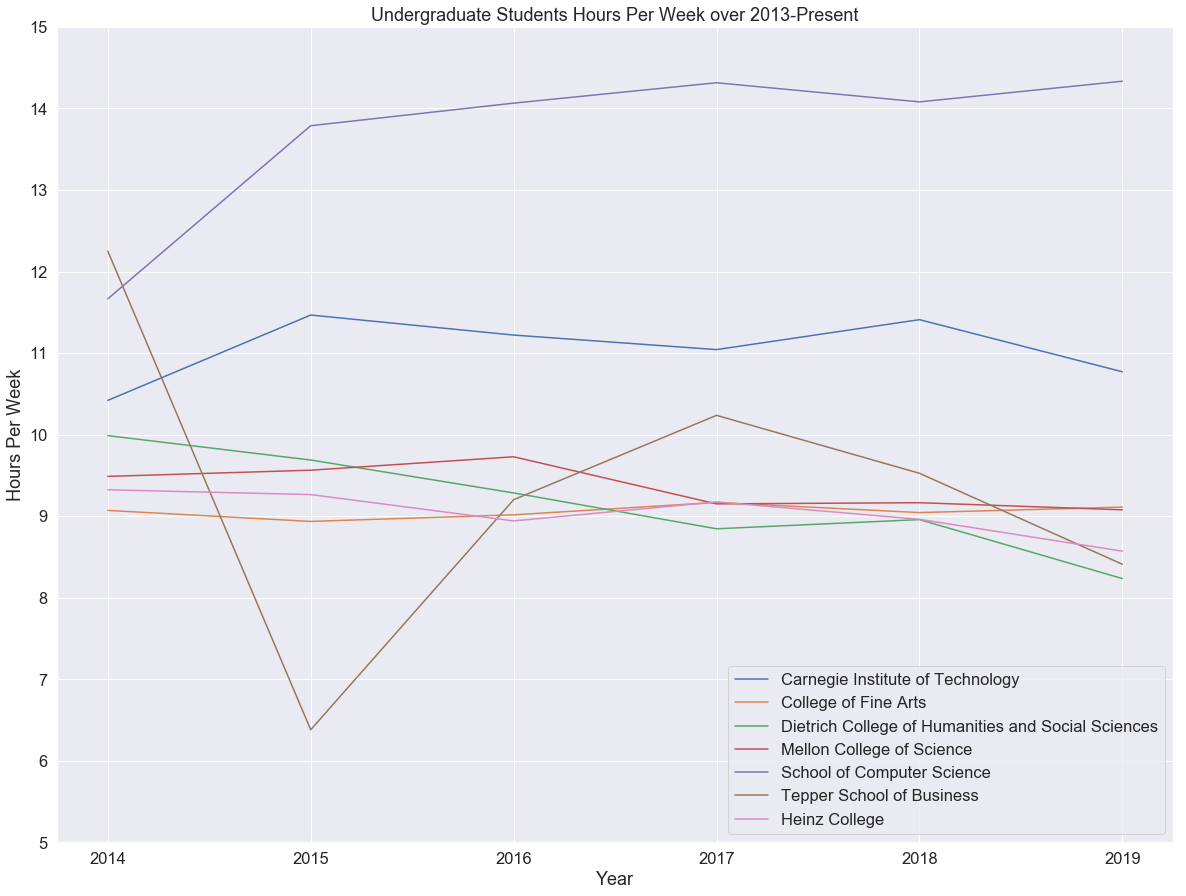

In [117]:
avg_grad_fce = avg_grad_fce.groupby(["Year", "College"], as_index=False).mean()
avg_grad_fce = avg_grad_fce[avg_grad_fce["Year"] > 2013]
avg_grad_fce = avg_grad_fce[["Year", "College","Hrs Per Week"]]

getGraph(avg_grad_fce)

<a id='trend_con'></a> 
### 3.3 Conclusion
There are interesting trends when comparing the two graphs:
* We find that courses from the School of Computer Science consistently tend to have the highest hours per week over the years for both graphs. 
* The striking difference between the two graphs are that the graduate data seems to be less consistent throughout the years in comparison to the undergraduate data.

<a id='prof_track_title'></a> 
## 4. **Does an instructor's Track and Title have an impact on his/her overall teaching rate?**
At Carnegie Mellon University, there are tracks for professorships. The two we are interested in are the teaching and tenure tracks. We are curious to see if the track of a professor's professorship affects the rating of courses. 

<a id='4.1'></a> 
## 4.1 Question One:  Does the track of a professor (teaching vs tenure) influence their overall teaching rating?

<a id='s1'></a> 
### Step 1: Getting the faculty title data
We will massage the data for Dietrich, Heinz, and SCS.
We first **create a faculty list file** for each CMU college, we will use this data as input to Monzenda to query the **faculty title data** from CMU Directory: https://directory.andrew.cmu.edu/

In [118]:
df_prof = df.copy()
df_prof["Name"] = df_prof["Name"].str.replace(",", "")

df_2019Heinz = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == "Heinz College")]
lst_Heinz_2019 = df_2019Heinz["Name"].unique()
if not os.path.exists("Heinz2019.csv"):
    print("Creating Heinz 2019 faculty list...", end="")
    pd.DataFrame(lst_Heinz_2019).to_csv("Heinz2019.csv")
    print("Done!")
    
df_2019Dietrich = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " Dietrich College of Humanities and Social Sciences")]
lst_Dietrich_2019 = df_2019Dietrich["Name"].unique()
if not os.path.exists("Dietrich2019.csv"):
    print("Creating Dietrich 2019 faculty list...", end="")
    pd.DataFrame(lst_Dietrich_2019).to_csv("Dietrich2019.csv")
    print("Done!")
    
df_2019SCS = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " School of Computer Science")]
lst_SCS_2019 = df_2019SCS["Name"].unique()
if not os.path.exists("SCS2019.csv"):
    print("Creating SCS 2019 faculty list...", end="")
    pd.DataFrame(lst_SCS_2019).to_csv("SCS2019.csv")
    print("Done!")
    
df_2019MCS = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " Mellon College of Science")]
lst_MCS_2019 = df_2019MCS["Name"].unique()
if not os.path.exists("MCS2019.csv"):
    print("Creating MCS 2019 faculty list...", end="")
    pd.DataFrame(lst_MCS_2019).to_csv("MCS2019.csv")
    print("Done!")
    
df_2019CIT = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " Carnegie Institute of Technology")]
lst_CIT_2019 = df_2019CIT["Name"].unique()
if not os.path.exists("CIT2019.csv"):
    print("Creating CIT 2019 faculty list...", end="")
    pd.DataFrame(lst_CIT_2019).to_csv("CIT2019.csv")
    print("Done!")
    
df_2019CFA = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " College of Fine Arts")]
lst_CFA_2019 = df_2019CFA["Name"].unique()
if not os.path.exists("CFA2019.csv"):
    print("Creating CFA 2019 faculty list...", end="")
    pd.DataFrame(lst_CFA_2019).to_csv("CFA2019.csv")
    print("Done!")
    
df_2019TPR = df_prof[(df_prof["Year"] == 2019) & (df_prof["College"] == " Tepper School of Business")]
lst_TPR_2019 = df_2019TPR["Name"].unique()
if not os.path.exists("TPR2019.csv"):
    print("Creating TPR 2019 faculty list...", end="")
    pd.DataFrame(lst_TPR_2019).to_csv("TPR2019.csv")
    print("Done!")

<a id='s2'></a> 
### Step 2: Using Mozenda to scrape the faculty title data from CMU Directory
Now that we have prepared the input query lists as above, we input them into Mozenda, a web-scraping tool, and we have the list of scraped data from the CMU Directory as follows.

In [119]:
scraped_lst = ["Scraped_Dietrich2019.csv", "Scraped_Heinz2019.csv", 
               "Scraped_SCS2019.csv", "Scraped_MCS2019.csv", "Scraped_CIT2019.csv", 
                   "Scraped_CFA2019.csv", "Scraped_TPR2019.csv"]

<a id='s3'></a> 
### Step 3: Preprocessing the FCE data

* First, we process the original data we have from the FCE, **selecting the relevant fields** (`Name` and `Overall Teaching Rate`).
* Next, we **group** the dataframes for each college by the professor's `Name` and get the **mean overall teaching rate**.
* Finally, we **reset the index** for convience of processing the data.

In [120]:
df_2019Heinz_info = df_2019Heinz[["Name", "Overall teaching rate"]]
df_2019Dietrich_info = df_2019Dietrich[["Name", "Overall teaching rate"]]
df_2019SCS_info = df_2019SCS[["Name", "Overall teaching rate"]]
df_2019MCS_info = df_2019MCS[["Name", "Overall teaching rate"]]
df_2019CIT_info = df_2019CIT[["Name", "Overall teaching rate"]]
df_2019CFA_info = df_2019CFA[["Name", "Overall teaching rate"]]
df_2019TPR_info = df_2019TPR[["Name", "Overall teaching rate"]]

df_2019Dietrich_info = df_2019Dietrich_info.groupby(["Name"]).mean()
df_2019Heinz_info = df_2019Heinz_info.groupby(["Name"]).mean()
df_2019SCS_info = df_2019SCS_info.groupby(["Name"]).mean()
df_2019MCS_info = df_2019MCS_info.groupby(["Name"]).mean()
df_2019CIT_info = df_2019CIT_info.groupby(["Name"]).mean()
df_2019CFA_info = df_2019CFA_info.groupby(["Name"]).mean()
df_2019TPR_info = df_2019CFA_info.groupby(["Name"]).mean()

df_2019Dietrich_info = df_2019Dietrich_info.reset_index()
df_2019Heinz_info = df_2019Heinz_info.reset_index()
df_2019SCS_info = df_2019SCS_info.reset_index()
df_2019MCS_info = df_2019MCS_info.reset_index()
df_2019CIT_info = df_2019CIT_info.reset_index()
df_2019CFA_info = df_2019CFA_info.reset_index()
df_2019TPR_info = df_2019CFA_info.reset_index()

<a id='s4'></a> 
### Step 4: Preprocessing the scraped faculty title data

Now that we have the scraped raw data from the CMU Directory and the processed FCE data, all we need to do before the anaylsis is to **preprocess the scraped faculty title data**. <br>

For each college, we **create a dataframe** that contains the **faculty title** information, and then we **merge** it with the **processed FCE data** which contains the **Name** and **Overall teaching rate** information for each professor. 

In [121]:
# This is a helper function to get the faculty title information from the raw
# scraped data we have.

def f(s):
    s = s.replace("\n", " ")
    if ("Select a name below" in s) or ("You have reached the search limit" in s) or \
       ("No exact matches" in s):
        return "Error"
    s1 = "Job Title According to HR:"
    s2 = "Department with which this person is affiliated:"
    ind1 = s.find(s1) + len(s1)
    ind2 = s.find(s2)
    return s[ind1:ind2]

In [122]:
scraped_dietrich_df = pd.read_csv(scraped_lst[0])
scraped_dietrich_df["Title"] = scraped_dietrich_df["Info"].apply(f)
df_2019Dietrich_info_merged = df_2019Dietrich_info.merge(scraped_dietrich_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019Dietrich_info_merged.columns) and ("Info" in df_2019Dietrich_info_merged.columns):
    df_2019Dietrich_info_merged = df_2019Dietrich_info_merged.drop(columns=["ItemID", "Info"])
    
    
scraped_heinz_df = pd.read_csv(scraped_lst[1])
scraped_heinz_df["Title"] = scraped_heinz_df["Info"].apply(f)
df_2019Heinz_info_merged = df_2019Heinz_info.merge(scraped_heinz_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019Heinz_info_merged.columns) and ("Info" in df_2019Heinz_info_merged.columns):
    df_2019Heinz_info_merged = df_2019Heinz_info_merged.drop(columns=["ItemID", "Info"])


scraped_scs_df = pd.read_csv(scraped_lst[2])
scraped_scs_df["Title"] = scraped_scs_df["Info"].apply(f)
df_2019SCS_info_merged = df_2019SCS_info.merge(scraped_scs_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019SCS_info_merged.columns) and ("Info" in df_2019SCS_info_merged.columns):
    df_2019SCS_info_merged = df_2019SCS_info_merged.drop(columns=["ItemID", "Info"])
    
    
scraped_mcs_df = pd.read_csv(scraped_lst[3])
scraped_mcs_df["Title"] = scraped_mcs_df["Info"].apply(f)
df_2019MCS_info_merged = df_2019MCS_info.merge(scraped_mcs_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019MCS_info_merged.columns) and ("Info" in df_2019MCS_info_merged.columns):
    df_2019MCS_info_merged = df_2019MCS_info_merged.drop(columns=["ItemID", "Info"])
    
    
scraped_cit_df = pd.read_csv(scraped_lst[4])
scraped_cit_df["Title"] = scraped_cit_df["Info"].apply(f)
df_2019CIT_info_merged = df_2019CIT_info.merge(scraped_cit_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019CIT_info_merged.columns) and ("Info" in df_2019CIT_info_merged.columns):
    df_2019CIT_info_merged = df_2019CIT_info_merged.drop(columns=["ItemID", "Info"])
    
    
scraped_cfa_df = pd.read_csv(scraped_lst[5])
scraped_cfa_df["Title"] = scraped_cfa_df["Info"].apply(f)
df_2019CFA_info_merged = df_2019CFA_info.merge(scraped_cfa_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019CFA_info_merged.columns) and ("Info" in df_2019CFA_info_merged.columns):
    df_2019CFA_info_merged = df_2019CFA_info_merged.drop(columns=["ItemID", "Info"])
    

scraped_tpr_df = pd.read_csv(scraped_lst[6])
scraped_tpr_df["Title"] = scraped_tpr_df["Info"].apply(f)
df_2019TPR_info_merged = df_2019TPR_info.merge(scraped_tpr_df, how="outer", left_index=True,right_index=True)
if ("ItemID" in df_2019TPR_info_merged.columns) and ("Info" in df_2019TPR_info_merged.columns):
    df_2019TPR_info_merged = df_2019TPR_info_merged.drop(columns=["ItemID", "Info"])

<a id='s5'></a> 
### Step 5: Analysis of teaching vs tenure track professor overall teaching rate

Since we have all the necessary information from step 1~4, we will now create a bar graph to compare the average tenure track professor rating and the average teaching track professor rating across all the different colleges at Carnegie Mellon University.

* First, we **create a function** that return **a list of ratings for teaching track professors** and **a list of ratings for tenure track professors**. When creating the list of tenured professors, we made sure that the title `Research` was also not included since some schools have `Research Professors`


In [123]:
def getTeachingVsTenure(csv):
    teaching = csv[csv['Title'].str.contains("Teaching", na=False)]
    tenure_temp = csv[~csv['Title'].str.contains("Teaching|Research", na=False)]
    tenure = tenure_temp[tenure_temp['Title'].str.contains("Professor", na=False)]
    teaching_faculty = {}
    tenure_faculty = {}
    for x in teaching["Name"]:
        person = csv[csv["Name"] == x]
        rating = float(person["Overall teaching rate"].mean())
        if not math.isnan(rating): teaching_faculty[x] = rating

    for x in tenure["Name"]:
        person = csv[csv["Name"] == x]
        rating = float(person["Overall teaching rate"].mean())
        if not math.isnan(rating): tenure_faculty[x] = rating
    
    teachingList = [teaching_faculty[x] for x in teaching_faculty]
    tenureList = [tenure_faculty[x] for x in tenure_faculty]
    return teachingList, tenureList

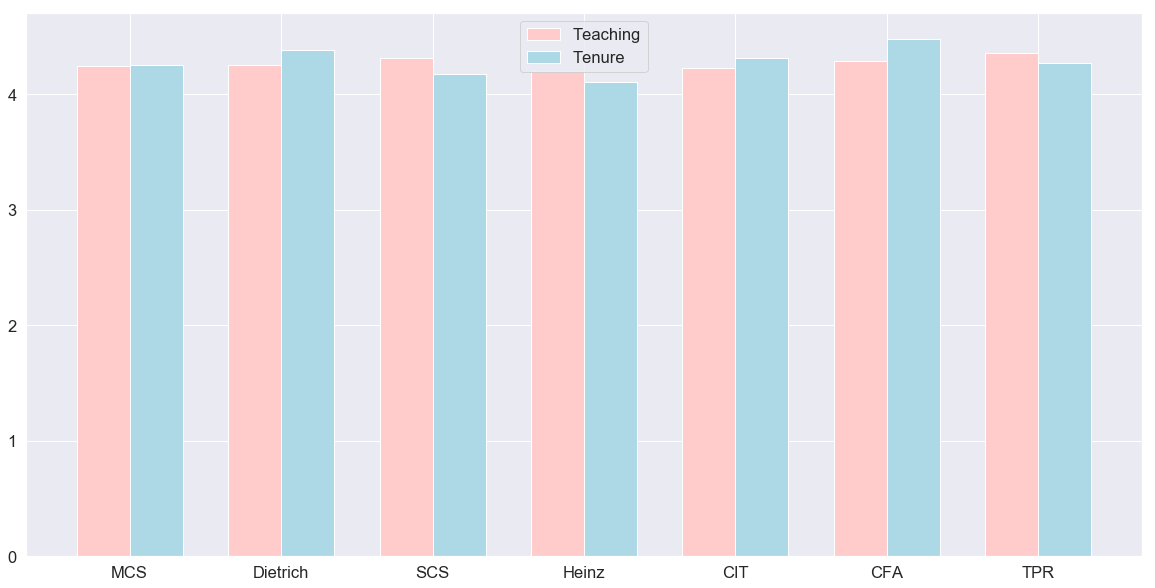

In [124]:
schools = ["MCS", "Dietrich", "SCS", "Heinz", "CIT", "CFA", "TPR"]
csvs = [df_2019MCS_info_merged, df_2019Dietrich_info_merged, df_2019SCS_info_merged, 
        df_2019Heinz_info_merged, df_2019CIT_info_merged, df_2019CFA_info_merged, df_2019TPR_info_merged]

teachList = []
tenureList = []

for file in csvs:
    teaching, tenure = getTeachingVsTenure(file)
    teachList.append(sum(teaching)/len(teaching))
    tenureList.append(sum(tenure)/len(tenure))
    
N = len(schools)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
bar1 = ax.bar(ind, teachList, width, color='#ffcccb')
bar2 = ax.bar(ind + width, tenureList, width, color='#add8e6')

# add some text for labels, title and axes ticks
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(schools)

ax.legend((bar1[0], bar2[0]), ('Teaching', 'Tenure'))

plt.show()

<a id='4.1_con'></a> 
### 4.16 Conclusion:
After plotting the average overall teaching rate for teaching vs tenure track professors at the seven main colleges, we find no clear relationship between the track of a professor and his/her overall teaching rate. Thus we conclude that the instructor's track is not a good indicator of his/her overall teaching rate.

<a id='4.2'></a> 
## 4.2 Question Two: Is there a relationship between Instructor Titles and `Overall teaching rate`?

Instructor titles provide a heirarchy for professorship, we are curious about whether the title of an instructor may influence his/her overall teaching rating.

We start off by creating a function that gets all instructors of a given title.

In [125]:
# 0 = Professors
# 1 = Associate
# 2 = Assistant
# 3 = Student

def getTitle(csv, title: int):
    if title < 0 or title > 4:
        return []
    if title == 0:
        professors = csv[(~csv['Title'].str.contains("Associate", na=False)) & 
                         (csv['Title'].str.contains("Professor", na=False)) & 
                        ~(csv['Title'].str.contains("Assistant", na=False))]
    elif title == 1:
        professors = csv[(csv['Title'].str.contains("Associate", na=False)) & 
                         (csv['Title'].str.contains("Professor", na=False)) & 
                        ~(csv['Title'].str.contains("Assistant", na=False))]
    elif title == 2: 
        professors = csv[(~csv['Title'].str.contains("Associate", na=False)) & 
                         (csv['Title'].str.contains("Professor", na=False)) & 
                        (csv['Title'].str.contains("Assistant", na=False))]
    else:
        professors = csv[(csv['Title'].str.contains("Job", na=False)) & 
                         (csv['Title'].str.contains("Student", na=False))]
    output_dict = {}
    for x in professors["Name"]:
        person = csv[csv["Name"] == x]
        rating = float(person["Overall teaching rate"].mean())
        if not math.isnan(rating): output_dict[x] = rating
    output = [output_dict[x] for x in output_dict]
    return output



<a id='4.21'></a> 
### 4.21 Visualization of data (Bar graph)
Let us first visualize our data. We will create a grouped bar graph with each group have 4 bars. Each bar will represent the mean rating of each title and each group will represent a college.

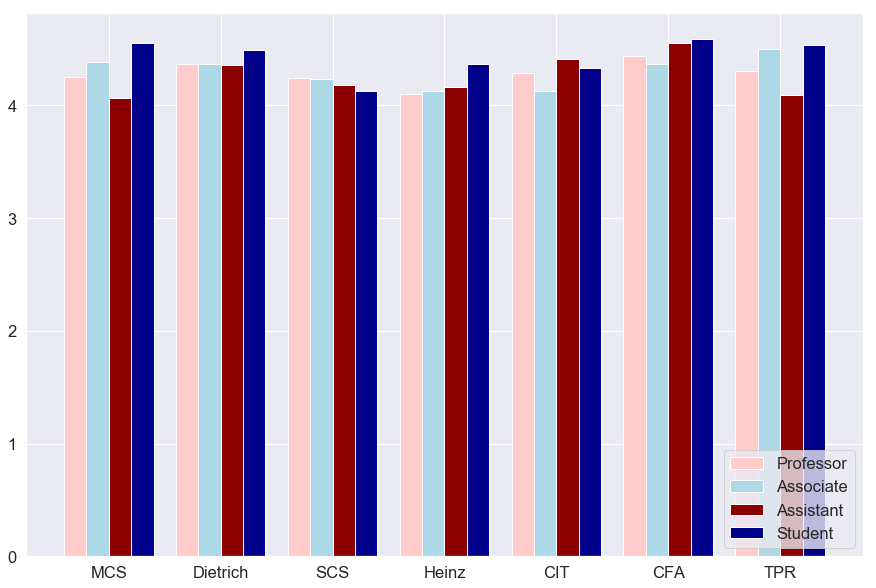

In [126]:
schools = ["MCS", "Dietrich", "SCS", "Heinz", "CIT", "CFA", "TPR"]
csvs = [df_2019MCS_info_merged, df_2019Dietrich_info_merged, df_2019SCS_info_merged, 
        df_2019Heinz_info_merged, df_2019CIT_info_merged, df_2019CFA_info_merged, df_2019TPR_info_merged]

#schools = ["Dietrich", "SCS", "Heinz"]
#csvs = [df_2019Dietrich_info_merged, df_2019SCS_info_merged, df_2019Heinz_info_merged]

proList = []
assoList = []
assistList = []
studentList = []

for file in csvs:
    data = getTitle(file, 0)
    proList.append(sum(data)/len(data))
    data = getTitle(file, 1)
    assoList.append(sum(data)/len(data))
    data = getTitle(file, 2)
    assistList.append(sum(data)/len(data))
    data = getTitle(file, 3)
    studentList.append(sum(data)/len(data))


N = len(schools)

ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig, ax = plt.subplots(figsize=(15, 10))
bar1 = ax.bar(ind, proList, width, color='#ffcccb')
bar2 = ax.bar(ind + width, assoList, width, color='#add8e6')
bar3 = ax.bar(ind + width+width, assistList, width, color='#8b0000')
bar4 = ax.bar(ind + width+width+width, studentList, width, color='#00008b')

# add some text for labels, title and axes ticks
ax.set_xticks(ind + 3*width/2)
ax.set_xticklabels(schools)

ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Professor', 'Associate', 'Assistant', 'Student'), loc=4)

plt.show()

<a id='4.22'></a> 
### 4.22 Visualization of data (Boxplot)
On inspection, we find that there is no clear pattern which distinguishes the titles. With that being said, let us use a box plot to visualize the distribution of ratings across each title.

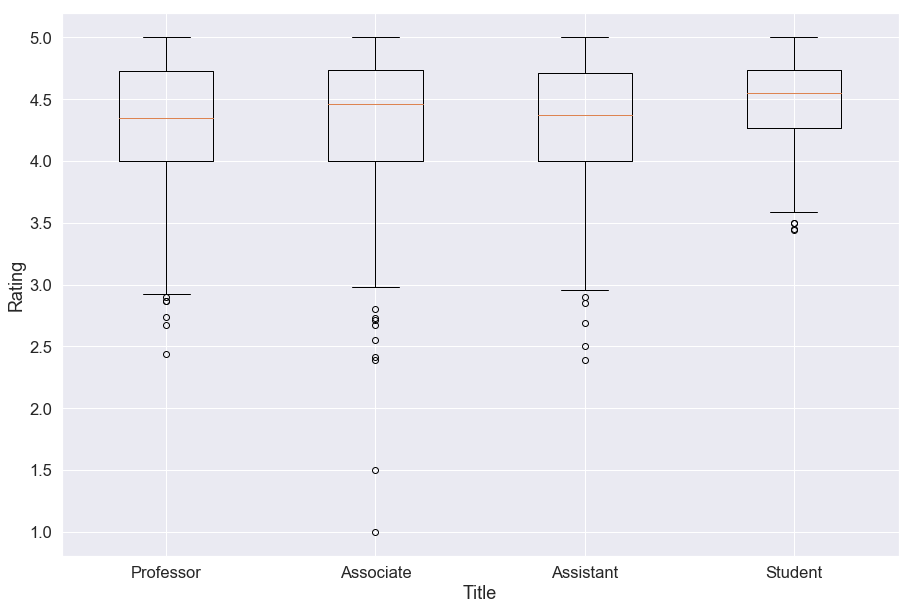

In [127]:
schools = ["MCS", "Dietrich", "SCS", "Heinz", "CIT", "CFA", "TPR"]
csvs = [df_2019MCS_info_merged, df_2019Dietrich_info_merged, df_2019SCS_info_merged, 
        df_2019Heinz_info_merged, df_2019CIT_info_merged, df_2019CFA_info_merged, df_2019TPR_info_merged]

#schools = ["Dietrich", "SCS", "Heinz"]
#csvs = [df_2019Dietrich_info_merged, df_2019SCS_info_merged, df_2019Heinz_info_merged]

pos = {0: [], 1: [], 2: [], 3: []}

for file in csvs:
    for x in range(4):
        data = getTitle(file, x)
        pos[x] += data

area = np.pi*(10)**2

# Plot
fig, ax = plt.subplots(figsize=(15,10))

ax.boxplot(pos.values())
ax.set_xticklabels(["Professor","Associate","Assistant","Student"])

plt.xlabel("Title")
plt.ylabel("Rating")
plt.show()

<a id='4.23'></a> 

### 4.23 Conclusion: 
Interestingly, we find that **the professor titles tend to be distributed similarly**, with the `Associate` title having many low outliers. <br>
We also find that surprisingly, **the student instructor** distribution tends to be be shifted higher than other distributions, that is student instructors tend to have **higher ratings** than professors.

<a id='5'></a> 

## Final Conclusions

By applying data science techniques to the Faculty Course Evaulations (FCEs) and other scrapped data, we have found some interesting results.


### Further Investigations
There are further investigations that can be done in regards to the FCE data. The following are questions that can be answered with more data and/or time:

* **Does a promotion in professor ranking (i.e. Associate Professor to Full Professor) change a professor's `Overall teaching rate`?**

    To conduct this analysis, we would require data detailing when professors are promoted. With this data, we can observe whether or not a professor's teaching ability is impacted by a promotion in rank.
    
    
* **Accuracy of RateMyProfessor vs. FCE Ratings**

    To conduct this analysis, we would need the comments of the FCE ratings (currently not provided). With this, we can do a sentimental analysis to check if the sentiments of the FCE comments match with the sentiments of the comments posted on RateMyProfessor. Additionally, we can compare the `Overall teaching rate` with the RateMyProfessor rating for each professor.